## Data description

We have the following files:

- `sample_submission.csv`: example of a submission file
- `train_matches.jsonl`, `test_matches.jsonl`: full "raw" training data 
- `train_features.csv`, `test_features.csv`: features created by organizers
- `train_targets.csv`: results of training games (including the winner)

## Features created by organizers

These are basic features which include simple players' statistics. Scroll to the end to see how to build these features from raw json files.

In [1]:
from urllib.request import urlopen
import pandas as pd
df_train_features = pd.read_csv(urlopen('https://github.com/roman-rybalko/mlcourse.ai/blob/master/data/dota2/train_features.csv?raw=true'),
                                index_col='match_id_hash')
df_train_targets = pd.read_csv(urlopen('https://github.com/roman-rybalko/mlcourse.ai/blob/master/data/dota2/train_targets.csv?raw=true'),
                               index_col='match_id_hash')

We have ~ 40k games, each described by `match_id_hash` (game id) and 245 features. Also `game_time` is given - time (in secs) when the game was over. 

In [2]:
df_train_features.shape

(39675, 245)

In [3]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39675 entries, a400b8f29dece5f4d266f49f1ae2e98a to 9928dfde50efcbdb2055da23dcdbc101
Columns: 245 entries, game_time to d5_sen_placed
dtypes: float64(30), int64(215)
memory usage: 74.5+ MB


In [4]:
df_train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


We are interested in the `radiant_win` column in `train_targets.csv`. All these features are not known during the game (they come "from future" as compared to `game_time`), so we have these features only for training data. 

In [5]:
df_train_targets.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [6]:
df_train_targets['radiant_win'].value_counts()

True     20826
False    18849
Name: radiant_win, dtype: int64

## Training and evaluating a model

#### Let's construct a feature matrix `X` and a target vector `y`

In [7]:
X = df_train_features.values
y = df_train_targets['radiant_win'].values

#### Perform  a train/test split (a simple validation scheme)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

#### Searching for the best feature combination

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def make_model(features):
    return Pipeline([
        ('ct', ColumnTransformer([
            ('feat', 'passthrough', features)
        ], sparse_threshold=0, verbose=True)),
        ('ss', StandardScaler()),
        ('lr', LogisticRegression(random_state=17, verbose=3, solver='liblinear')),
    ], verbose=3)

In [10]:
%%time
from sklearn.metrics import roc_auc_score
import numpy as np
features = []
scores = []
models = []
best_features = list(range(X.shape[1]))
for i in range(X.shape[1]):
    m = make_model(best_features)
    m.fit(X_train, y_train)
    y_pred = m.predict_proba(X_valid)[:, 1]
    score = roc_auc_score(y_valid, y_pred)
    scores.append(score)
    best_features = np.delete(best_features, np.argmin(m.named_steps['lr'].coef_))
    features.append(best_features)
    models.append(m)
    print('Score:', score)

[ColumnTransformer] .......... (1 of 1) Processing feat, total=   0.0s
[Pipeline] ................ (step 1 of 3) Processing ct, total=   0.1s
[Pipeline] ................ (step 2 of 3) Processing ss, total=   0.2s
[LibLinear][Pipeline] ................ (step 3 of 3) Processing lr, total=   4.7s
Score: 0.8117948243474836
[ColumnTransformer] .......... (1 of 1) Processing feat, total=   0.0s
[Pipeline] ................ (step 1 of 3) Processing ct, total=   0.0s
[Pipeline] ................ (step 2 of 3) Processing ss, total=   0.1s
[LibLinear][Pipeline] ................ (step 3 of 3) Processing lr, total=   5.6s
Score: 0.8114414566591941
[ColumnTransformer] .......... (1 of 1) Processing feat, total=   0.0s
[Pipeline] ................ (step 1 of 3) Processing ct, total=   0.0s
[Pipeline] ................ (step 2 of 3) Processing ss, total=   0.1s
[LibLinear][Pipeline] ................ (step 3 of 3) Processing lr, total=   5.2s
Score: 0.8106435287084014
[ColumnTransformer] .......... (1 of 

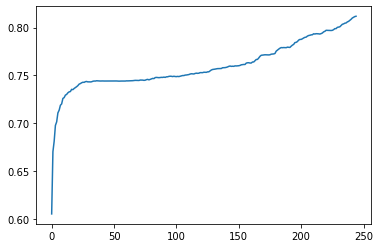

In [22]:
import matplotlib.pyplot as plt
plt.plot([len(x) for x in features], scores)
plt.show()

In [23]:
len(features[np.argmax(scores)])

244

In [12]:
df_train_features.columns[features[np.argmax(scores)]]

Index(['game_time', 'game_mode', 'lobby_type', 'objectives_len', 'chat_len',
       'r1_hero_id', 'r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=244)

In [13]:
df_train_features.columns[np.delete(range(X.shape[1]), features[np.argmax(scores)])]

Index(['d5_level'], dtype='object')

In [14]:
model = models[np.argmax(scores)]
scores[np.argmax(scores)]

0.8117948243474836

## Preparing a submission

Now the same for test data.

In [15]:
df_test_features = pd.read_csv(urlopen('https://github.com/roman-rybalko/mlcourse.ai/blob/master/data/dota2/test_features.csv?raw=true'),
                               index_col='match_id_hash')

X_test = df_test_features.values
y_test_pred = model.predict_proba(X_test)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, 
                                 index=df_test_features.index)

In [16]:
df_submission.head()

,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.559816
70e5ba30f367cea48793b9003fab9d38,0.953074
4d9ef74d3a2025d79e9423105fd73d41,0.958862
2bb79e0c1eaac1608e5a09c8e0c6a555,0.710851
bec17f099b01d67edc82dfb5ce735a43,0.276450


Save the submission file, it's handy to include current datetime in the filename. 

In [17]:
submission_file = 'features_featimp_ss_lr.csv'

In [18]:
df_submission.to_csv(submission_file)

In [19]:
!wc -l {submission_file}

10001 features_featimp_ss_lr.csv


In [20]:
from IPython.display import FileLink
FileLink(submission_file)

/content/features_featimp_ss_lr.csv

In [21]:
!cat {submission_file}

match_id_hash,radiant_win_prob
30cc2d778dca82f2edb568ce9b585caa,0.5598155376421005
70e5ba30f367cea48793b9003fab9d38,0.9530738251056726
4d9ef74d3a2025d79e9423105fd73d41,0.9588618794000706
2bb79e0c1eaac1608e5a09c8e0c6a555,0.7108507160101204
bec17f099b01d67edc82dfb5ce735a43,0.2764497850322143
038acbb47d9eb54c11962d07cce8d829,0.07896496523170946
b891f03bb2a86d78b84043437fc95e04,0.9052850397644927
ff898afdb5bb5c7163bde45a009503f7,0.030447536308473633
72e6b1c31c718c0806f9aaeb8b7290a9,0.6326043151764346
abd97ab60ceca3ae6f00a28baea8a43c,0.7514443980766073
d46d5407bd08b42245e1bf2de86da403,0.0860409876567421
a176147b06a337304ab179cd3b432015,0.4306322951316294
f4e59a3443f4d1e55b8639651dca3a4d,0.05493397104078019
2b8263ce33e0320e9d8b2775f65c3eef,0.4550585998252182
2d0803ecc11a376020a41da9aa255e23,0.9992411100466329
4e043d36d488c88b73afec997ea4fb76,0.9782133621528836
30f5b5e14622068c186b6f4e937bd6b9,0.6502961368258736
44ef19f09cec7868270e5e62aba4a3ff,0.7173229069334787
47b462bb8974dbe082357e8b1ddec